In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from time import perf_counter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from IPython.display import Markdown, display
def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-website-dataset/dataset.csv


In [2]:
df=pd.read_csv('../input/phishing-website-dataset/dataset.csv')

In [3]:
df.head(3)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1


In [4]:
df.shape

(11055, 32)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Result', ylabel='count'>

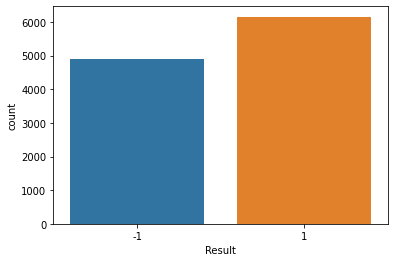

In [5]:
import seaborn as sns
sns.countplot(df['Result'])

In [6]:
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())


having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [7]:
df['Result']=df['Result'].replace(-1,0)

In [8]:
print(df.corr()['Result'].sort_values())    

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


<AxesSubplot:>

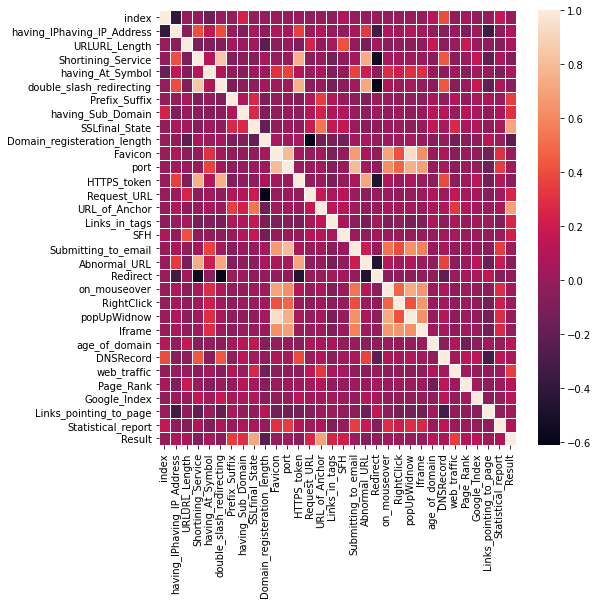

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), linewidths=.5)

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score

X= df.drop(columns='Result')
Y=df['Result']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)
Accuracy=[]
Duration=[]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
start = perf_counter()
logreg=LogisticRegression(solver='liblinear')
logreg=logreg.fit(train_X,train_Y)
prediction=logreg.predict(test_X)
accuracy_score(prediction,test_Y)
Accuracy.append(accuracy_score(prediction,test_Y))
print(Accuracy[0])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[0])

0.9258365993367501
0.2


In [12]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
start = perf_counter()
clf = BernoulliNB()
clf.fit(train_X, train_Y)
naive_predict=clf.predict(test_X)
accuracy_score(naive_predict,test_Y)
Accuracy.append(accuracy_score(naive_predict,test_Y))
print(Accuracy[1])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[1])

0.9035272836900814
0.02


In [13]:
from sklearn.ensemble import RandomForestClassifier
start = perf_counter()
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
accuracy_score(ran_pred,test_Y)
Accuracy.append(accuracy_score(ran_pred,test_Y))
print(Accuracy[2])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[2])

0.9505577328911667
0.58


In [14]:
from sklearn.tree import DecisionTreeClassifier
start = perf_counter()
tree = DecisionTreeClassifier(criterion='entropy') # function to measure the quality of split 
tree.fit(train_X,train_Y)
score = cross_val_score(tree, X, Y, cv= 10) 
print(score)
print(score.mean())
y_pred = tree.predict(test_X)
Accuracy.append(accuracy_score(y_pred,test_Y))
print(Accuracy[3])

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print(Duration[3])

[0.96745027 0.9755877  0.95840868 0.96745027 0.95750452 0.95022624
 0.93574661 0.91945701 0.94932127 0.94570136]
0.9526853935342394
0.9538739825143202
0.45


In [15]:
model=["LogisticRegression", "BernoulliNB","RandomForestClassifier", "DecisionTreeClassifier"]
models_acc = []
for i in range(0,4):
    models_acc.append([model[i],Accuracy[i],Duration[i]])
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy,Training time (sec)
0,DecisionTreeClassifier,0.953874,0.45
1,RandomForestClassifier,0.950558,0.58
2,LogisticRegression,0.925837,0.20
3,BernoulliNB,0.903527,0.02


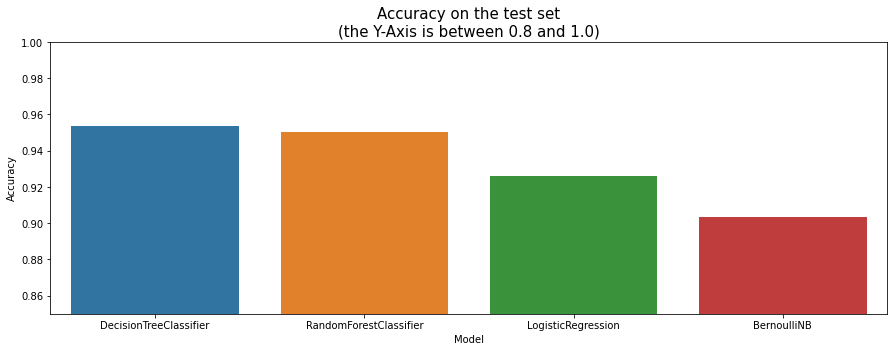

In [16]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)
plt.ylim(0.85,1)
plt.show()

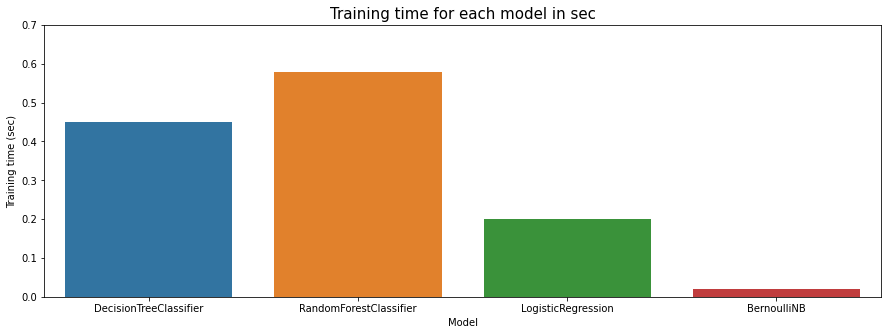

In [17]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,0.7)
plt.show()

In [18]:
tree = DecisionTreeClassifier(criterion='entropy') # function to measure the quality of split 
tree.fit(train_X,train_Y)
y_pred = tree.predict(test_X)
def display_result(df):
    for i in range (0,20,4):
        msg = df.drop(columns='Result')
        label = df["Result"].iloc[i]
        pred_label = tree.predict(msg)
        printmd(f"**Real: {label}, Predicted: {pred_label[i]}**")
        printmd("_______________________________________________________________")
        print()
        print()
display_result(df)   

**Real: 0, Predicted: 0**

_______________________________________________________________

**Real: 1, Predicted: 1**

_______________________________________________________________

**Real: 1, Predicted: 1**

_______________________________________________________________

**Real: 0, Predicted: 0**

_______________________________________________________________

**Real: 0, Predicted: 0**

_______________________________________________________________